In [ ]:
# Installations
# pip install ipykernel nbformat pandas seaborn plotly

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Data Set random static
df.sample(10, random_state=2024)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [5]:
# Find duplicates
df = df.drop_duplicates()
df.shape

# There aren't duplicates

(891, 12)

In [16]:
df['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [21]:
# Drop colums PassengerID, Name, Ticket
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1)

KeyError: "['PassengerId', 'Name', 'Ticket'] not found in axis"

In [22]:
df.info()

# Survived, Pclass, Sex, Cabin, Embarked are a categorical fact, because it does not make sense to extract descriptive metrics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [32]:
# Transform to categorical
df["Survived"] = pd.Categorical(df["Survived"])
df["Pclass"] = pd.Categorical(df["Pclass"])
df["Sex"] = pd.Categorical(df["Sex"])
df["Cabin"] = pd.Categorical(df["Cabin"])
df["Embarked"] = pd.Categorical(df["Embarked"])
                                
# Transform to int64
df["Age"] = df["Age"].fillna(-1).astype(np.int16, errors="ignore")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    int16   
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(5), float64(1), int16(1), int64(2)
memory usage: 33.7 KB


In [30]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
179,0,3,male,36.0,0,0,0.0000,NaN,S
206,0,3,male,32.0,1,0,15.8500,NaN,S
356,1,1,female,22.0,0,1,55.0000,E33,S
190,1,2,female,32.0,0,0,13.0000,NaN,S
756,0,3,male,28.0,0,0,7.7958,NaN,S
613,0,3,male,NaN,0,0,7.7500,NaN,Q
241,1,3,female,NaN,1,0,15.5000,NaN,Q
267,1,3,male,25.0,1,0,7.7750,NaN,S
814,0,3,male,30.5,0,0,8.0500,NaN,S
577,1,1,female,39.0,1,0,55.9000,E44,S


In [34]:
df[df["Age"] == -1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,-1,0,0,8.4583,NaN,Q
17,1,2,male,-1,0,0,13.0000,NaN,S
19,1,3,female,-1,0,0,7.2250,NaN,C
26,0,3,male,-1,0,0,7.2250,NaN,C
28,1,3,female,-1,0,0,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,-1,0,0,7.2292,NaN,C
863,0,3,female,-1,8,2,69.5500,NaN,S
868,0,3,male,-1,0,0,9.5000,NaN,S
878,0,3,male,-1,0,0,7.8958,NaN,S


In [35]:
df["Age"] = df["Age"].apply(lambda x:  x if x >= 0 else np.nan)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 38.9 KB


In [38]:
df.describe(include= np.number).T
# .T is transpose

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.679272,14.536483,0.0,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [41]:
df.describe(include= "category").T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Sex,891,2,male,577
Cabin,204,147,G6,4
Embarked,889,3,S,644


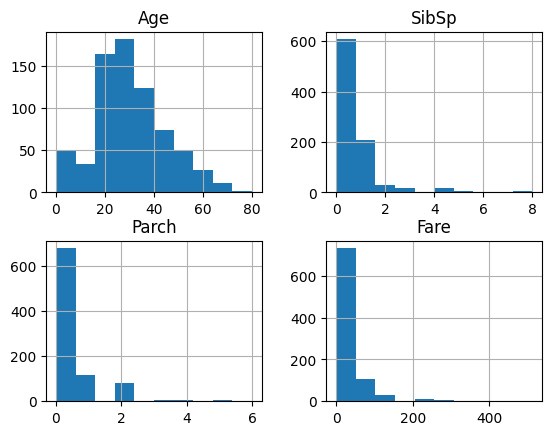

In [43]:
# Univariate Analysis
df.select_dtypes(include= np.number).hist()
# Avoid text
plt.show()

<Axes: xlabel='Fare'>

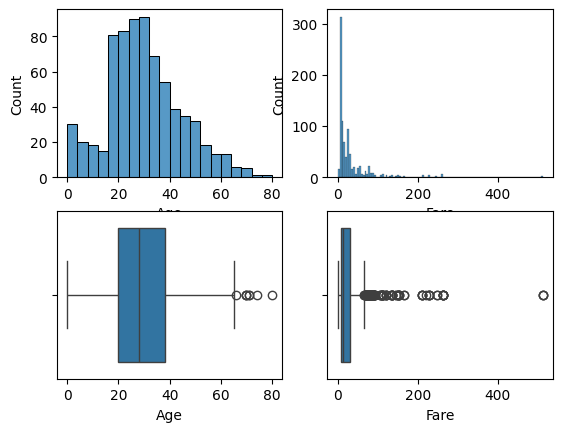

In [44]:
fig, axis = plt.subplots(2, 2)
sns.histplot(ax= axis[0, 0], data= df, x="Age")
sns.boxplot(ax=axis[1, 0], data=df, x="Age")
sns.histplot(ax= axis[0, 1], data= df, x="Fare")
sns.boxplot(ax=axis[1, 1], data=df, x="Fare")

<Axes: xlabel='count', ylabel='Survived'>

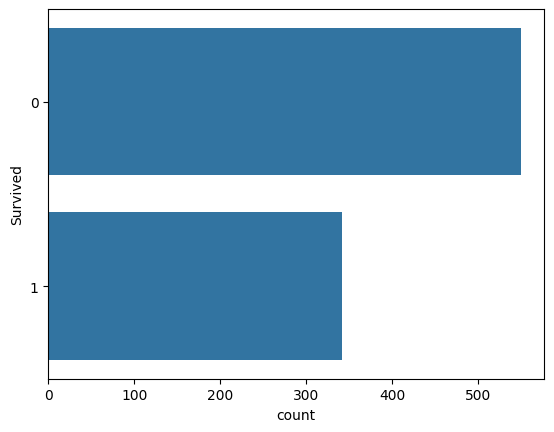

In [46]:
# Univariate Analysis Categorical
sns.countplot(data= df, y= "Survived")

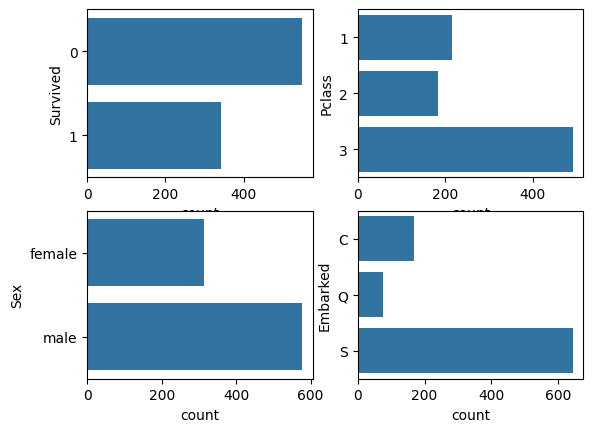

In [52]:
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "Survived")
sns.countplot(ax=axis[0, 1], data= df, y="Pclass")
sns.countplot(ax=axis[1, 0], data= df, y="Sex")
sns.countplot(ax=axis[1, 1], data= df, y="Embarked")
plt.show()

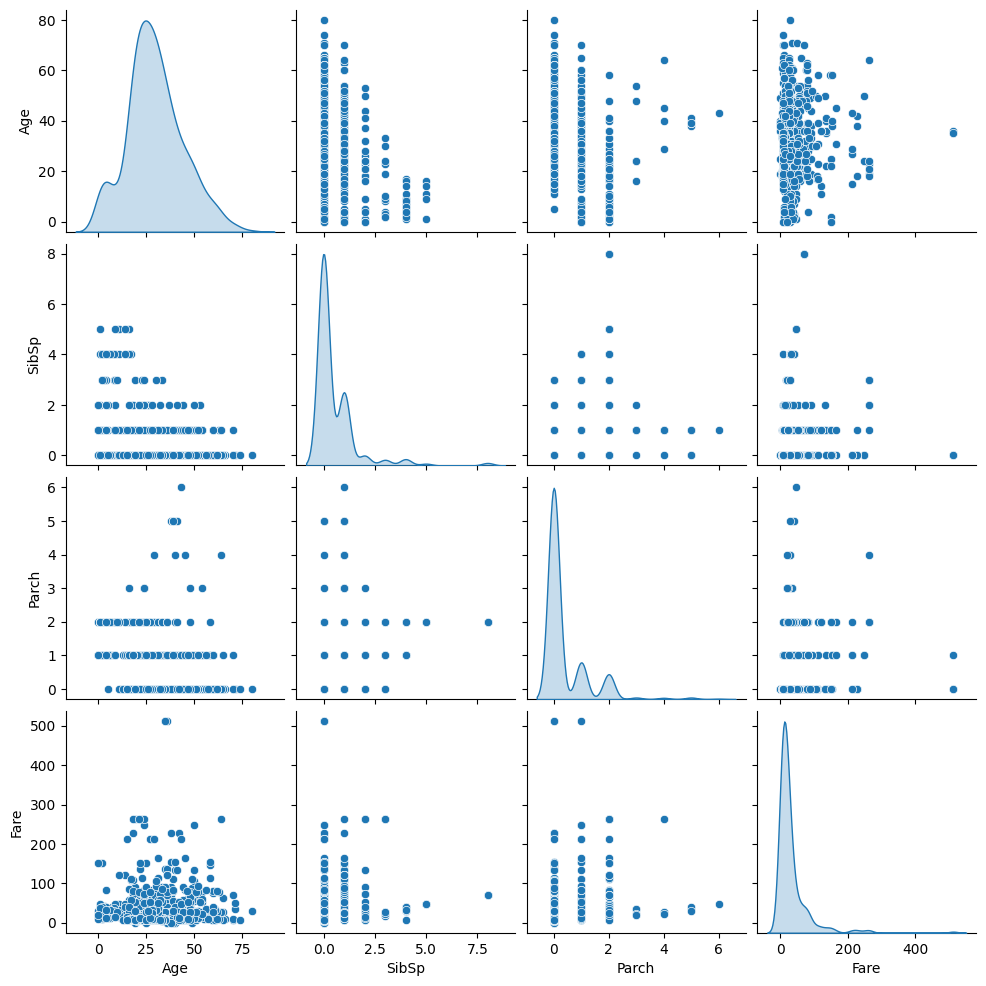

In [56]:
# Analisis bivariado numerico - numerico
sns.pairplot(data= df.select_dtypes(include= np.number), diag_kind='kde')
plt.show()

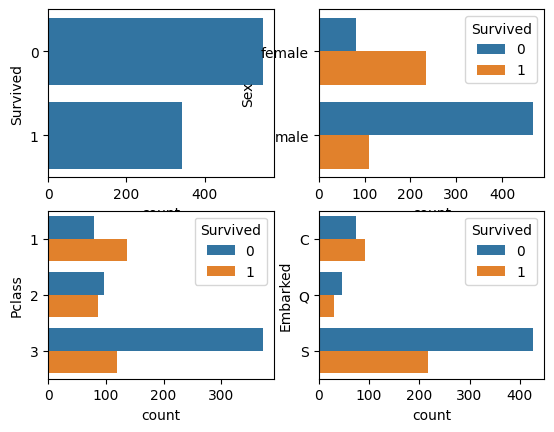

In [58]:
# Analisis bivariado cat -cat
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "Survived")
sns.countplot(ax=axis[1, 0], data= df, y="Pclass", hue="Survived")
sns.countplot(ax=axis[0, 1], data= df, y="Sex", hue= "Survived")
sns.countplot(ax=axis[1, 1], data= df, y="Embarked", hue= "Survived")
plt.show()



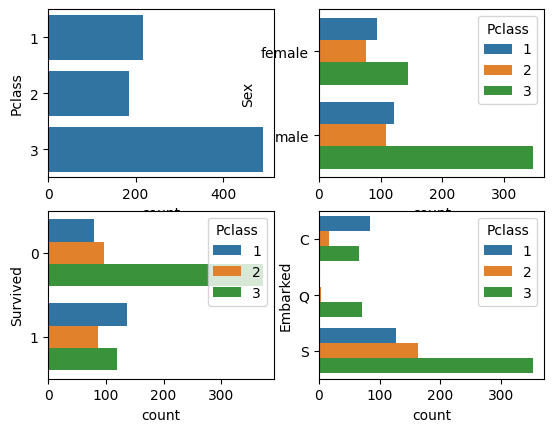

In [59]:
# Analisis bivariado cat -cat
fig, axis = plt.subplots(2, 2)
sns.countplot(ax=axis[0, 0], data= df, y= "Pclass")
sns.countplot(ax=axis[1, 0], data= df, y="Survived", hue="Pclass")
sns.countplot(ax=axis[0, 1], data= df, y="Sex", hue= "Pclass")
sns.countplot(ax=axis[1, 1], data= df, y="Embarked", hue= "Pclass")
plt.show()

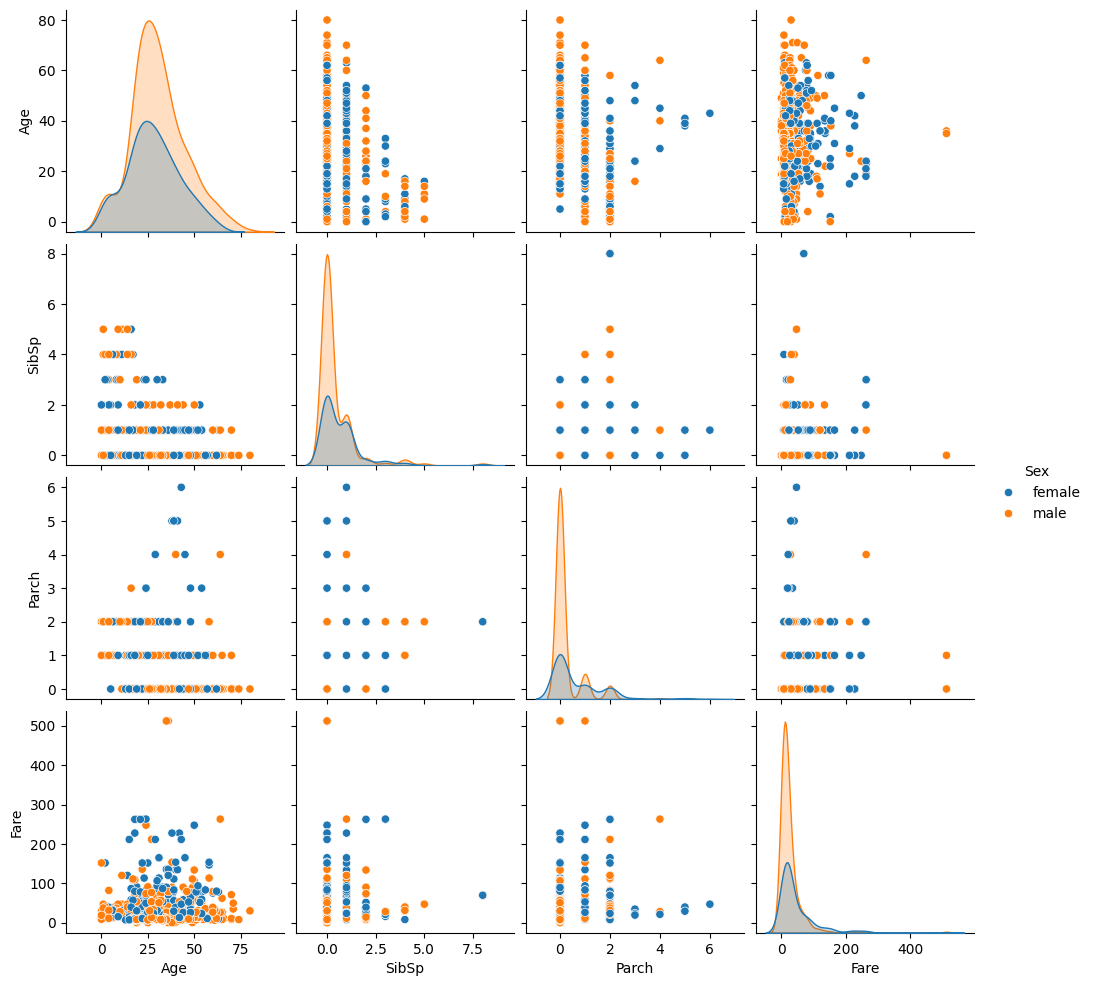

In [61]:
sns.pairplot(data= df, hue="Sex", diag_kind='kde')
plt.show()

In [62]:
df.select_dtypes(include= np.number).corr()

# Corr por defecto utiliza la correlacion Pearson
# Cuando el valor se acerca a 1 es una relación lineal positiva
# Cuando el valor se acerca a -1 es una relación linea negativa
# Cuando el valor tiende a 0 indica que no hay una relación

,Age,SibSp,Parch,Fare
Age,1.000000,-0.307947,-0.189307,0.096288
SibSp,-0.307947,1.000000,0.414838,0.159651
Parch,-0.189307,0.414838,1.000000,0.216225
Fare,0.096288,0.159651,0.216225,1.000000


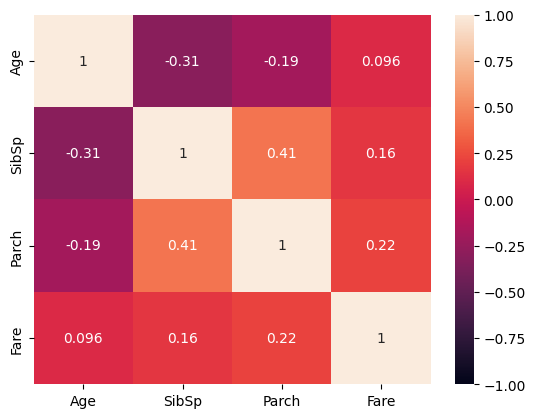

In [65]:
sns.heatmap(df.select_dtypes(include= np.number).corr(), vmin= -1, vmax= 1, annot=True)
plt.show()

In [66]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [68]:
df_1 = pd.DataFrame(X)
df_1['Target'] = y
df_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
